In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statistics
from sklearn.preprocessing import MinMaxScaler
from scipy import stats as sci_st



In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
armatore = pd.read_excel("/content/gdrive/MyDrive/Armatore/Planilha LIMPA PARA USO - Copia.xlsx")

1 - Livro: Livro1 - Livro11

2 - IDF: IDF1-IDF5

3 - TRP: TRP1-TRP3

4 - RCP: RCP1 - RCP4

5 - SST: SST1 - SST3

6 - PER: PER1 - PER3

7 - AVP: AVP1 - AVP5

8 - SAT: SAT1 - SAT6

9 - PAO: PAO1 - PAO3

10 - IDT: IDT1 - IDT6

11 - FAT: FAT1 - FAT5

12 - LAT: LAT1 - LAT8

13 - LEC: LEC1 - LEC8

In [ ]:
armatore.rename(columns={'Est_Civil':'EstCivil'},inplace= True)

In [ ]:
Atributos2 = ['Time','Genero','Idade','Instrucao','EstCivil']

In [ ]:
Atributos = ['Livro','IDF','TRP','RCP','SST','PER','AVP','SAT','PAO','PAO','FAT','LAT','LEC']

In [ ]:
for atrib in Atributos:  
  print(list(armatore.filter(regex=atrib).columns))

['Livro_1', 'Livro_2', 'Livro_3', 'Livro_4', 'Livro_5', 'Livro_6', 'Livro_7', 'Livro_8', 'Livro_9', 'Livro_10', 'Livro_11']
['IDF1', 'IDF2', 'IDF3', 'IDF4', 'IDF5']
['TRP1', 'TRP2', 'TRP3']
['RCP1LEC', 'RCP2', 'RCP3', 'RCP4']
['SST1', 'SST2', 'SST3']
['PER1', 'PER2', 'PER3']
['AVP1', 'AVP2', 'AVP3', 'AVP4', 'AVP5']
['SAT1', 'SAT2', 'SAT3', 'SAT4', 'SAT5', 'SAT6']
['PAO1', 'PAO2', 'PAO3']
['PAO1', 'PAO2', 'PAO3']
['FAT1', 'FAT2', 'FAT3', 'FAT4', 'FAT5']
['LAT1', 'LAT2', 'LAT3 (NORMAL)', 'LAT4 (NORMAL)', 'LAT5', 'LAT6', 'LAT7', 'LAT8']
['RCP1LEC', 'LEC1', 'LEC2', 'LEC3', 'LEC4', 'LEC5', 'LEC6', 'LEC7', 'LEC8']


Conteúdo das colunas

In [ ]:
for colun in armatore.filter(regex="PER").columns:
  print(colun, armatore[colun].unique())

PER1 [ 2 99  4  5  7  6  1  3]
PER2 [ 4 99  7  2  1  6  5  3]
PER3 [ 1 99  4  5  6  7  2  3]


In [ ]:
def nulo(x):
  if x == 99:
    return np.nan
  else:
    return x

for coluna in armatore.columns:
  if str(armatore[coluna].dtypes) == 'object' :
    armatore[coluna] = armatore[coluna].apply(lambda x: nulo(x)) 

for coluna in armatore.columns:
  armatore[coluna] = armatore[coluna].apply(lambda x: nulo(x)) 

dummies = pd.get_dummies(armatore[['Pais', 'Cidade','Estado','Freque_Compra','CD_Distribuicao','2_time','Rival_Escrever','Nome']])
armatore = armatore.drop(columns=['Pais', 'Estado','Cidade','Freque_Compra','CD_Distribuicao','2_time','Rival_Escrever','Nome'])
armatore = pd.concat([armatore,dummies],axis=1)

"""

  #if str(armatore[coluna].dtypes) == 'float64' or str(armatore[coluna].dtypes) == 'int64' or str(armatore[coluna].dtypes) == 'uint8':
for coluna in armatore.columns:
  media = armatore[coluna].mean()
  try:
    for indice in armatore[armatore[coluna].isnull()].index:
      armatore[coluna].iloc[indice] = media
    armatore[coluna]= [((x-armatore[coluna].min())/(armatore[coluna].max()-armatore[coluna].min()))for x in armatore[coluna]]
  except:
    print(coluna)
    #armatore[coluna] = StandardScaler().fit_transform(np.array(armatore[coluna]).reshape(-1,1))
"""

"\n\n  #if str(armatore[coluna].dtypes) == 'float64' or str(armatore[coluna].dtypes) == 'int64' or str(armatore[coluna].dtypes) == 'uint8':\nfor coluna in armatore.columns:\n  media = armatore[coluna].mean()\n  try:\n    for indice in armatore[armatore[coluna].isnull()].index:\n      armatore[coluna].iloc[indice] = media\n    armatore[coluna]= [((x-armatore[coluna].min())/(armatore[coluna].max()-armatore[coluna].min()))for x in armatore[coluna]]\n  except:\n    print(coluna)\n    #armatore[coluna] = StandardScaler().fit_transform(np.array(armatore[coluna]).reshape(-1,1))\n"

In [ ]:
for coluna in Atributos2:
  print(coluna, armatore[coluna].unique())

Time [ 9. 30. 11. 21. 25. 29.  3. 18. 28. 20. 14. 17. 13.  2. 19. 16. 10.  6.
 22. 24. 26. 27. 15.  7.  5.  8. 23. 12. nan  4.]
Genero [1 2 3]
Idade [33 41 22 34 40 31 32 36 17 20 30 28 18 23 68 42 25 21 24 37 26 27 14 50
 63 38 57 59 19 39 58 54 45 70 51 29 60 62 35 49 71 55 43 16 53 44 48 61
 47 75 52 46 56 15 73 67  0 65 64]
Instrucao [ 6.  5.  8.  7.  3.  4.  2.  1. nan]
EstCivil [ 2.  1.  3. nan  5.]


In [ ]:
for coluna in Atributos2:
  moda = armatore[coluna].mode()[0]
  for i in armatore[armatore[coluna].isnull()].index:
    armatore[coluna].iloc[i] = moda

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
armatore['Idadefaixa'] = pd.cut(armatore['Idade'],
                                 bins=(0,18,25,35,55,76),
                                 labels=('0 a 18','18 a 25','25 a 35','35 a 55','55 a 76'))

In [ ]:
armatore['Idadefaixa'].unique()

['25 a 35', '35 a 55', '18 a 25', '0 a 18', '55 a 76', NaN]
Categories (5, object): ['0 a 18' < '18 a 25' < '25 a 35' < '35 a 55' < '55 a 76']

In [ ]:
armatore1 = armatore.copy()
armatore2 = armatore.copy()
armatore3 = armatore.copy()
armatore4 = armatore.copy()

#### Moda

In [ ]:
armatore['2_time_-'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
list_exp = []
for coluna in Atributos:
  colunas = list(armatore1.filter(regex=coluna).columns)
  for atrib in colunas:
    moda = armatore1[atrib].mode()[0]
    for indice in armatore1[armatore1[atrib].isnull()].index:
      try:
        armatore1[atrib].astype(float)
        armatore1[atrib].iloc[indice] = moda
        
      except: list_exp.append(atrib)

set(list_exp)


#normalizacao = MinMaxScaler()

#for coluna in Atributos2:
#  moda = armatore1[coluna].mode()[0]
#  for index in armatore1[armatore1[coluna].isnull()].index:
#    armatore1[coluna].iloc[index] = moda

#  armatore1[coluna]= normalizacao.fit_transform(np.array(armatore1[coluna].values).reshape(-1,1))



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


set()

In [ ]:
for erro_c in set(list_exp):
  print(armatore1[erro_c].unique())

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
st = StandardScaler()

In [ ]:
list_exp = []
Resultado = {"Atributo":[],"explained_variance_ratio_":[],"singular_values_":[]}
for coluna in Atributos:
  colunas = list(armatore1.filter(regex=coluna).columns)
  try:
    st.fit(np.array(armatore1[colunas]).reshape(-len(colunas),len(colunas)))
    xpp = st.transform(np.array(armatore1[colunas]).reshape(-len(colunas),len(colunas)))
    pca = PCA(n_components=1)
    x2p = pca.fit_transform(xpp)
    Resultado['Atributo'].append(coluna)
    Resultado['explained_variance_ratio_'].append(pca.explained_variance_ratio_[0])
    Resultado['singular_values_'].append(pca.singular_values_[0])


    armatore1[coluna+'_PC'] = x2p
    



  except: list_exp.append(coluna)


list_exp




[]

In [ ]:
armatore1[Atributos2]

,Time,Genero,Idade,Instrucao,EstCivil
0,9.0,1,33,6.0,2.0
1,30.0,1,33,6.0,2.0
2,11.0,1,41,6.0,1.0
3,21.0,1,22,5.0,1.0
4,25.0,1,33,8.0,1.0
...,...,...,...,...,...
1240,13.0,1,46,8.0,2.0
1241,9.0,3,0,8.0,2.0
1242,25.0,1,42,8.0,2.0
1243,17.0,1,35,8.0,2.0


In [ ]:
armatore1[['Livro_PC','IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']]

,Livro_PC,IDF_PC,TRP_PC,RCP_PC,SST_PC,PER_PC,AVP_PC,SAT_PC,PAO_PC,PAO_PC,FAT_PC,LAT_PC,LEC_PC
0,3.783835,5.525101,-2.783975,2.349377,0.716945,2.147579,1.584456,0.914097,3.875353,3.875353,1.560353,5.521687,3.276997
1,-1.942445,-0.405516,0.523181,0.149600,-0.607698,-0.426981,-1.339559,-0.552296,-0.739390,-0.739390,-1.171925,-1.780973,-0.588046
2,3.806787,-1.565421,0.523181,-0.172975,-0.607698,-0.426981,-1.339559,-1.729591,-3.140522,-3.140522,-1.696130,-1.428332,-2.034626
3,-1.563366,-1.121791,1.994466,-2.037668,-1.286706,-1.112953,-1.677056,-3.153804,-1.235309,-1.235309,-1.036374,-1.831525,-1.707156
4,0.627114,-1.565421,0.523181,0.149600,-0.003708,1.742316,-0.632658,2.436794,0.428287,0.428287,-2.134501,-0.643413,-2.060365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,1.541184,0.484097,-1.681590,-1.445184,0.696978,0.562934,-1.677056,-2.573183,-1.681177,-1.681177,-0.191426,-0.856464,-1.832149
1241,-1.183977,-1.565421,0.523181,0.149600,-0.607698,-0.426981,-1.339559,-0.552296,-0.739390,-0.739390,-1.171925,-1.780973,-0.588046
1242,-2.422065,-1.565421,-2.783975,3.902663,2.335311,1.374854,1.700962,3.858638,1.155004,1.155004,0.943760,-0.292570,0.838612
1243,0.118402,-1.565421,0.523181,-1.769100,0.945633,-0.596307,2.533031,1.390176,1.237513,1.237513,0.161112,0.361000,1.333899


In [ ]:
Atributos2[2] = 'Idadefaixa';Atributos2

['Time', 'Genero', 'Idadefaixa', 'Instrucao', 'EstCivil']

In [ ]:
a = 0
b = 1
for i in range(1,11):
  c = b
  b = b+a
  a = c
  

In [ ]:
pd.DataFrame(Resultado).sort_values('explained_variance_ratio_',ascending=False)

,Atributo,explained_variance_ratio_,singular_values_
2,TRP,0.812110,55.074759
1,IDF,0.782024,69.771777
9,PAO,0.748399,61.049400
3,RCP,0.726472,60.148385
4,SST,0.683608,50.529940
8,PAO,0.664533,49.819968
6,AVP,0.654943,63.851548
5,PER,0.645213,49.090418
10,FAT,0.593864,60.801365
7,SAT,0.551565,64.188696


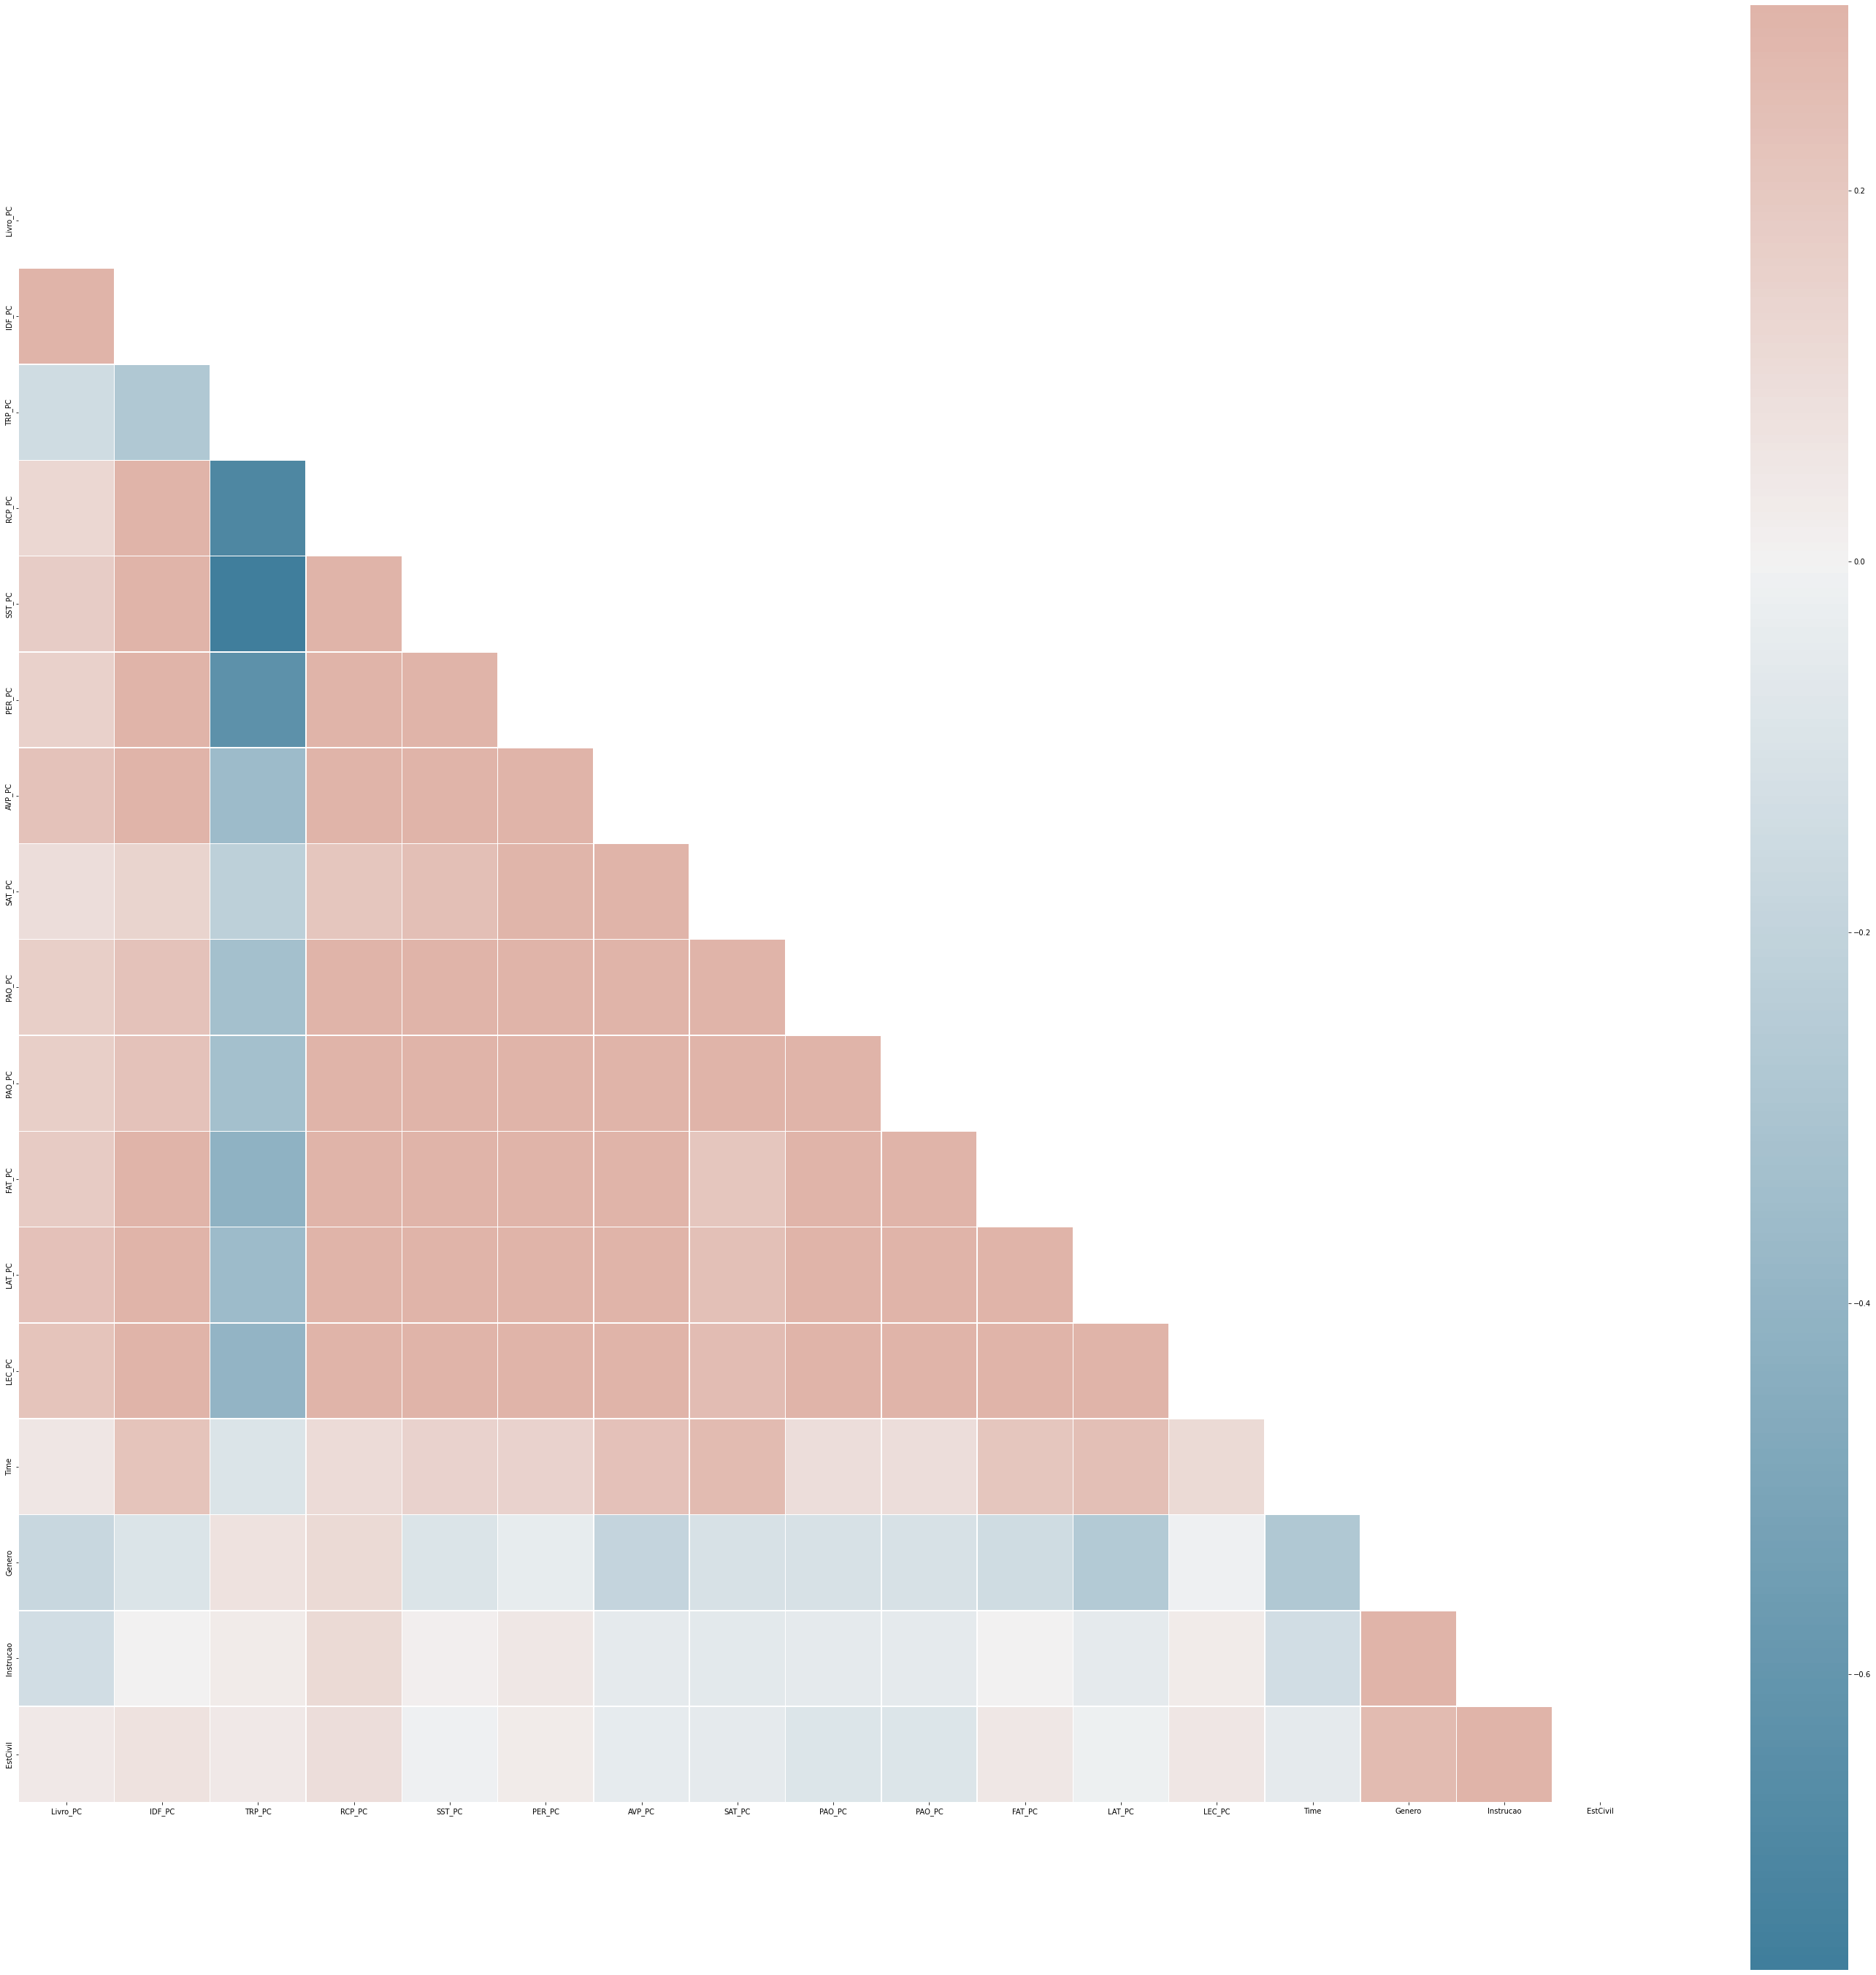

In [ ]:
corr = armatore1[['Livro_PC','IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']+Atributos2].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(50, 99))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
armatore1['Time'].unique()

array([ 9., 30., 11., 21., 25., 29.,  3., 18., 28., 20., 14., 17., 13.,
        2., 19., 16., 10.,  6., 22., 24., 26., 27., 15.,  7.,  5.,  8.,
       23., 12.,  4.])

Combinações


In [ ]:
import itertools
indx = []
for coluna_atr in Atributos2:
  unico = list(armatore1[coluna_atr].unique())
  for unk in unico: 
    indx.append(coluna_atr+'_'+str(unk))

combinacoes = list(itertools.combinations(indx,2));combinacoes

[('Time_9.0', 'Time_30.0'),
 ('Time_9.0', 'Time_11.0'),
 ('Time_9.0', 'Time_21.0'),
 ('Time_9.0', 'Time_25.0'),
 ('Time_9.0', 'Time_29.0'),
 ('Time_9.0', 'Time_3.0'),
 ('Time_9.0', 'Time_18.0'),
 ('Time_9.0', 'Time_28.0'),
 ('Time_9.0', 'Time_20.0'),
 ('Time_9.0', 'Time_14.0'),
 ('Time_9.0', 'Time_17.0'),
 ('Time_9.0', 'Time_13.0'),
 ('Time_9.0', 'Time_2.0'),
 ('Time_9.0', 'Time_19.0'),
 ('Time_9.0', 'Time_16.0'),
 ('Time_9.0', 'Time_10.0'),
 ('Time_9.0', 'Time_6.0'),
 ('Time_9.0', 'Time_22.0'),
 ('Time_9.0', 'Time_24.0'),
 ('Time_9.0', 'Time_26.0'),
 ('Time_9.0', 'Time_27.0'),
 ('Time_9.0', 'Time_15.0'),
 ('Time_9.0', 'Time_7.0'),
 ('Time_9.0', 'Time_5.0'),
 ('Time_9.0', 'Time_8.0'),
 ('Time_9.0', 'Time_23.0'),
 ('Time_9.0', 'Time_12.0'),
 ('Time_9.0', 'Time_4.0'),
 ('Time_9.0', 'Genero_1'),
 ('Time_9.0', 'Genero_2'),
 ('Time_9.0', 'Genero_3'),
 ('Time_9.0', 'Idadefaixa_25 a 35'),
 ('Time_9.0', 'Idadefaixa_35 a 55'),
 ('Time_9.0', 'Idadefaixa_18 a 25'),
 ('Time_9.0', 'Idadefaixa_0 a 1

TEST_T


In [ ]:
dicionario = {}
indx =[]
for coluna in ['Livro_PC','IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']:
  for unk in combinacoes:
    primeira = unk[0]
    segunda = unk[1]  

    slice0_s = primeira.split('_')[0]
    if slice0_s != 'Idadefaixa':
     slice0_n = float(primeira.split('_')[1])
    else:
      slice0_n = primeira.split('_')[1]

    slice1_s = segunda.split('_')[0]
    if slice1_s != 'Idadefaixa':
      slice1_n = float(segunda.split('_')[1])
    else:
      slice1_n = segunda.split('_')[1]


    if coluna in dicionario.keys():
      
      dicionario[coluna].append(float('%.6f'%(sci_st.ttest_ind(a=armatore1[armatore1[slice0_s]== slice0_n][coluna],
                   b=armatore1[armatore1[slice1_s]== slice1_n][coluna],
                   equal_var=True)[1])))
      if coluna not in ['IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']: #observe, apenas a coluna Livro_PC que é a primeira da lista acima, não está incluída, para não duplicar o index, basta tirar uma única coluna da lista principal
        indx.append((primeira,segunda))
    else:
      dicionario[coluna] = [float('%.4f'%(sci_st.ttest_ind(a=armatore1[armatore1[slice0_s]== slice0_n][coluna],
                   b=armatore1[armatore1[slice1_s]== slice1_n][coluna],
                   equal_var=True)[1]))]
      if coluna not in ['IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']: #observe, apenas a coluna Livro_PC que é a primeira da lista acima, não está incluída, para não duplicar o index, basta tirar uma única coluna da lista principal
        indx.append((primeira,segunda))


testet_componentes = pd.DataFrame(dicionario,index=indx)
testet_componentes

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 

,Livro_PC,IDF_PC,TRP_PC,RCP_PC,SST_PC,PER_PC,AVP_PC,SAT_PC,PAO_PC,FAT_PC,LAT_PC,LEC_PC
"(Time_9.0, Time_30.0)",0.000000,0.000000,0.194300,0.803900,0.237900,0.317900,0.030800,0.070200,0.082400,0.041600,0.016200,0.218200
"(Time_9.0, Time_11.0)",0.004921,0.384230,0.407942,0.170029,0.393332,0.600316,0.579767,0.000198,0.000573,0.718227,0.107929,0.122134
"(Time_9.0, Time_21.0)",0.001062,0.000000,0.081895,0.716896,0.000020,0.108223,0.000000,0.000000,0.979055,0.000000,0.000000,0.007243
"(Time_9.0, Time_25.0)",0.000289,0.000000,0.000008,0.005443,0.000000,0.000000,0.000000,0.000000,0.000123,0.000000,0.000000,0.000716
"(Time_9.0, Time_29.0)",0.303980,0.623819,0.436329,0.063824,0.300298,0.104278,0.663229,0.081064,0.528816,0.200942,0.928578,0.015639
...,...,...,...,...,...,...,...,...,...,...,...,...
"(EstCivil_2.0, EstCivil_3.0)",0.001531,0.000000,0.256608,0.131797,0.058150,0.008540,0.299851,0.079255,0.397160,0.002281,0.000611,0.029660
"(EstCivil_2.0, EstCivil_5.0)",0.000018,0.901274,0.548715,0.506447,0.060660,0.336623,0.795753,0.855134,0.538519,0.762949,0.570966,0.649756
"(EstCivil_1.0, EstCivil_3.0)",0.022489,0.000000,0.831447,0.009769,0.148980,0.012789,0.904881,0.699125,0.068666,0.001262,0.010601,0.019263
"(EstCivil_1.0, EstCivil_5.0)",0.000192,0.881390,0.423666,0.811929,0.064734,0.376979,0.586973,0.877450,0.899173,0.796887,0.366731,0.582647


In [ ]:

dicionario = {}
indx =[]
for coluna in ['Livro_PC','IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']:
  for coluna_atr in Atributos2:
    unico = list(armatore1[coluna_atr].unique())
    for unk in unico:        
      if coluna in dicionario.keys():
        dicionario[coluna].append(armatore1[armatore1[coluna_atr]== unk][coluna].mean())
        if coluna not in ['IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']: #observe, apenas a coluna Livro_PC que é a primeira da lista acima, não está incluída, para não duplicar o index, basta tirar uma única coluna da lista principal
          indx.append(coluna_atr+'_'+str(unk))
      else:
        dicionario[coluna] = [armatore1[coluna].mean()]
        if coluna not in ['IDF_PC','TRP_PC','RCP_PC','SST_PC','PER_PC','AVP_PC','SAT_PC','PAO_PC','FAT_PC','LAT_PC','LEC_PC']: #observe, apenas a coluna Livro_PC que é a primeira da lista acima, não está incluída, para não duplicar o index, basta tirar uma única coluna da lista principal
          indx.append(coluna_atr+'_'+str(unk))





media_componentes = pd.DataFrame(dicionario,index=indx)
media_componentes

,Livro_PC,IDF_PC,TRP_PC,RCP_PC,SST_PC,PER_PC,AVP_PC,SAT_PC,PAO_PC,FAT_PC,LAT_PC,LEC_PC
Time_9.0,-5.239896e-16,5.500286e-16,2.252549e-16,-4.904600e-16,-2.788042e-16,4.119864e-17,4.758353e-16,4.777972e-16,-2.068849e-17,4.505098e-16,3.479591e-16,-2.175859e-17
Time_30.0,2.254575e+00,3.531852e+00,5.231805e-01,1.496003e-01,-6.076981e-01,-4.269815e-01,-1.339559e+00,-5.522960e-01,-7.393897e-01,-1.171925e+00,-1.780973e+00,-5.880458e-01
Time_11.0,5.521950e-01,-3.428989e-01,-9.283613e-02,-3.133615e-01,-8.084574e-02,-1.496347e-02,-4.419343e-01,-9.541631e-01,-1.166693e+00,-3.164777e-01,-2.103621e-01,-6.145446e-01
Time_21.0,1.418745e-01,5.407939e-01,-1.310687e-01,1.177849e-02,2.815025e-01,6.968331e-02,3.006331e-01,-1.631098e+00,-1.004803e-01,5.205811e-01,6.200089e-01,4.232305e-01
Time_25.0,2.044024e-01,4.288485e-01,-4.539915e-01,4.627294e-01,5.306291e-01,6.554154e-01,9.254191e-01,2.161650e+00,4.820877e-01,6.183377e-01,8.983158e-01,4.689448e-01
Time_29.0,8.160642e-01,-1.219991e+00,-5.770464e-01,-1.712205e+00,-1.119878e+00,-1.498618e+00,-1.034020e+00,1.525104e+00,-7.752347e-01,-1.790033e+00,-6.619589e-01,-2.918907e+00
Time_3.0,-2.806547e-01,3.689680e-01,3.786730e-03,-7.548550e-01,1.717972e-01,2.059007e-01,8.296806e-01,7.598805e-01,1.585288e-01,-3.299987e-02,4.594577e-01,-4.421070e-02
Time_18.0,4.913687e-01,3.591109e-01,-3.420555e-01,1.943160e-01,6.034197e-01,9.757976e-02,5.945700e-01,1.315442e+00,-4.238298e-01,5.959357e-01,9.220577e-01,7.157565e-01
Time_28.0,-8.234905e-01,1.474640e-01,-4.430545e-01,8.955452e-01,5.968859e-01,3.152062e-01,8.713415e-01,4.005429e-01,7.748386e-01,8.305842e-01,1.262865e+00,1.047914e+00
Time_20.0,1.184092e-01,7.933395e-02,5.634980e-01,-6.987275e-01,-3.163332e-01,-4.607297e-02,6.010372e-01,1.062939e+00,1.109550e+00,2.054630e-01,3.382258e-01,-3.771561e-01


In [ ]:
media_componentes.to_csv("/content/gdrive/MyDrive/Armatore/media_componentes.csv",sep=";",decimal = ',')

####Mediana

In [ ]:
list_exp = []
for coluna in Atributos:
  colunas = list(armatore3.filter(regex=coluna).columns)
  for atrib in colunas:
    mediana = armatore3[atrib].median()
    for indice in armatore3[armatore3[atrib].isnull()].index:
      try:
        armatore3[atrib].astype(float)
        armatore3[atrib].iloc[indice] = mediana
      except: list_exp.append(atrib)




for coluna in Atributos2:
  mediana = armatore3[coluna].median()
  for index in armatore3[armatore3[coluna].isnull()].index:
    armatore3[coluna].iloc[index] = mediana


set(list_exp)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


set()

In [ ]:
st = StandardScaler()

In [ ]:
list_exp = []
Resultado = {"Atributo":[],"explained_variance_ratio_":[],"singular_values_":[]}
for coluna in Atributos:
  colunas = list(armatore3.filter(regex=coluna).columns)
  try:
    st.fit(np.array(armatore3[colunas]).reshape(-len(colunas),len(colunas)))
    xpp = st.transform(np.array(armatore3[colunas]).reshape(-len(colunas),len(colunas)))
    pca = PCA(n_components=1)
    x2p = pca.fit_transform(xpp)
    Resultado['Atributo'].append(coluna)
    Resultado['explained_variance_ratio_'].append(pca.explained_variance_ratio_[0])
    Resultado['singular_values_'].append(pca.singular_values_[0])
    

    armatore3[coluna+'_PC'] = x2p



  except: list_exp.append(coluna)


list_exp

[]

In [ ]:
pd.DataFrame(Resultado).sort_values('explained_variance_ratio_',ascending=False)

,Atributo,explained_variance_ratio_,singular_values_
2,TRP,0.812110,55.074759
1,IDF,0.762980,68.916984
9,PAO,0.737610,60.607732
3,RCP,0.725833,60.121938
4,SST,0.691770,50.830724
5,PER,0.686721,50.644887
10,FAT,0.663115,64.248657
8,PAO,0.650147,49.277755
6,AVP,0.640131,63.125418
7,SAT,0.594460,66.637972


#### Média

In [ ]:
list_exp = []
for coluna in Atributos:
  colunas = list(armatore4.filter(regex=coluna).columns)
  for atrib in colunas:
    media = armatore4[atrib].mean()
    for indice in armatore4[armatore4[atrib].isnull()].index:
      try:
        armatore4[atrib].astype(float)
        armatore4[atrib].iloc[indice] = media
      except: list_exp.append(atrib)


for coluna in Atributos2:
  media = armatore4[coluna].mean()
  for index in armatore4[armatore4[coluna].isnull()].index:
    armatore4[coluna].iloc[index] = media


set(list_exp)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


set()

In [ ]:
st = StandardScaler()

In [ ]:
list_exp = []
Resultado = {"Atributo":[],"explained_variance_ratio_":[],"singular_values_":[]}
for coluna in Atributos:
  colunas = list(armatore4.filter(regex=coluna).columns)
  try:
    st.fit(np.array(armatore4[colunas]).reshape(-len(colunas),len(colunas)))
    xpp = st.transform(np.array(armatore4[colunas]).reshape(-len(colunas),len(colunas)))
    pca = PCA(n_components=1)
    x2p = pca.fit_transform(xpp)
    Resultado['Atributo'].append(coluna)
    Resultado['explained_variance_ratio_'].append(pca.explained_variance_ratio_[0])
    Resultado['singular_values_'].append(pca.singular_values_[0])

    armatore4[coluna+'_PC'] = x2p
    



  except: list_exp.append(coluna)


list_exp

[]

In [ ]:
pd.DataFrame(Resultado).sort_values('explained_variance_ratio_',ascending=False)

,Atributo,explained_variance_ratio_,singular_values_
2,TRP,0.807113,54.905068
1,IDF,0.760537,68.806546
9,PAO,0.741171,60.753879
3,RCP,0.730573,60.317939
5,PER,0.690598,50.787648
4,SST,0.689075,50.731617
10,FAT,0.659432,64.069982
8,PAO,0.654895,49.457394
6,AVP,0.623573,62.303612
7,SAT,0.594988,66.667529


#### Drop

In [ ]:
list_exp = []
Resultado = {"Atributo":[],"explained_variance_ratio_":[],"singular_values_":[]}
for coluna in Atributos:
  colunas = list(armatore2.filter(regex=coluna).columns)
  new_armatore = armatore2[colunas].dropna(inplace = False)
  try:
    st.fit(np.array(new_armatore[colunas]).reshape(-len(colunas),len(colunas)))
    xpp = st.transform(np.array(new_armatore[colunas]).reshape(-len(colunas),len(colunas)))
    pca = PCA(n_components=1)
    pca.fit_transform(xpp)
    Resultado['Atributo'].append(coluna)
    Resultado['explained_variance_ratio_'].append(pca.explained_variance_ratio_[0])
    Resultado['singular_values_'].append(pca.singular_values_[0])
    



  except: list_exp.append(coluna)


list_exp

[' IDT']

In [ ]:
pd.DataFrame(Resultado)

,Atributo,explained_variance_ratio_,singular_values_
0,Livro,0.459435,67.404389
1,IDF,0.760537,62.248971
2,TRP,0.807113,48.036816
3,RCP,0.730573,52.772572
4,SST,0.689075,44.385435
5,PER,0.690598,44.434457
6,AVP,0.623573,54.652660
7,SAT,0.594988,58.480684
8,PAO,0.654895,43.383972
9,PAO,0.654895,43.383972


In [ ]:
new_armatore

,RCP1LEC,LEC1,LEC2,LEC3,LEC4,LEC5,LEC6,LEC7,LEC8
0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0
2,4.0,5.0,5.0,7.0,6.0,5.0,7.0,7.0,7.0
3,6.0,7.0,7.0,7.0,1.0,1.0,7.0,7.0,7.0
4,4.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0
5,7.0,7.0,5.0,7.0,5.0,3.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...
1238,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1240,5.0,7.0,5.0,7.0,5.0,1.0,7.0,7.0,7.0
1242,1.0,7.0,1.0,5.0,2.0,2.0,7.0,5.0,5.0
1243,4.0,5.0,3.0,3.0,3.0,2.0,6.0,2.0,6.0


In [ ]:
dicionario = {'amarelo':[1,2,3,4,5], 'azul':['hoje','dia'],'vermelho':'fevereiro'}

In [ ]:
dicionario.add('amarelo',10)

AttributeError: ignored

In [ ]:
dicionario['amarelo'].append(10)

In [ ]:
dicionario

{'amarelo': [1, 2, 3, 4, 5, 10],
 'azul': ['hoje', 'dia'],
 'vermelho': 'fevereiro'}

In [ ]:
dicionario['vermelho'] = []

In [ ]:
dicionario

{'amarelo': [1, 2, 3, 4, 5, 10], 'azul': ['hoje', 'dia'], 'vermelho': []}

In [ ]:
dicionario['rosa'] = [0]

In [ ]:
dicionario

{'amarelo': [1, 2, 3, 4, 5, 10],
 'azul': ['hoje', 'dia'],
 'rosa': [0],
 'vermelho': []}

In [ ]:
list(armatore['Idade_faixa'].unique())

['30 a 45', '15 a 30', '60 a 76', '0 a 15', '45 a 60', nan]